In [16]:
#Loading the datasets

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import cifar100
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = cifar100.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42)


In [18]:

def apply_activation(x, activation: str):
    if activation.lower() == "leaky_relu":
        return layers.LeakyReLU(alpha=0.1)(x)
    else:
        return layers.Activation(activation)(x)


In [19]:
# Cell 4: Model builder
def build_cnn(
    input_shape=(32, 32, 3),
    num_classes=100,
    filters=(32, 64, 128),
    kernel_size=3,
    activation="relu",
    dropout_rate=0.3,
    kernel_init="he_normal",
    l2_strength=0.0,
    use_bn=True
):
    reg = regularizers.l2(l2_strength) if l2_strength > 0 else None

    inp = layers.Input(shape=input_shape)
    x = inp

    for f in filters:
        x = layers.Conv2D(f, kernel_size, padding="same",
                          kernel_initializer=kernel_init,
                          kernel_regularizer=reg)(x)
        if use_bn:
            x = layers.BatchNormalization()(x)
        x = apply_activation(x, activation)

        x = layers.Conv2D(f, kernel_size, padding="same",
                          kernel_initializer=kernel_init,
                          kernel_regularizer=reg)(x)
        if use_bn:
            x = layers.BatchNormalization()(x)
        x = apply_activation(x, activation)

        x = layers.MaxPooling2D()(x)
        x = layers.Dropout(dropout_rate)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256, kernel_initializer=kernel_init,
                     kernel_regularizer=reg)(x)
    if use_bn:
        x = layers.BatchNormalization()(x)
    x = apply_activation(x, activation)
    x = layers.Dropout(dropout_rate)(x)

    out = layers.Dense(num_classes, activation="softmax")(x)
    model = models.Model(inp, out)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


In [20]:
model = build_cnn()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [21]:


from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
    ModelCheckpoint("best_cnn_model.h5", monitor='val_accuracy', save_best_only=True)
]



In [9]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=callbacks  # use the list you defined
)


Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0791 - loss: 4.1621

704/704 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 0.0791 - loss: 4.1615 - val_accuracy: 0.1590 - val_loss: 3.5913
Epoch 2/50
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2211 - loss: 3.1824

704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.2212 - loss: 3.1821 - val_accuracy: 0.2664 - val_loss: 2.9292
Epoch 3/50
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2998 - loss: 2.7444

704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.2998 - loss: 2.7442 - val_accuracy: 0.3542 - val_loss: 2.4983
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3604 - loss: 2.4558

704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3604 - loss: 2.4558 - val_accuracy: 0.4042 - val_loss: 2.2888
Epoch 5/50
698/704 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3961 - loss: 2.2756

704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.3961 - loss: 2.2754 - val_accuracy: 0.4338 - val_loss: 2.1393
Epoch 6/50
700/704 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4346 - loss: 2.1256

704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4346 - loss: 2.1257 - val_accuracy: 0.4508 - val_loss: 2.0250
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4528 - loss: 2.0183 - val_accuracy: 0.4470 - val_loss: 2.0794
Epoch 8/50
702/704 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4784 - loss: 1.9200

704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4784 - loss: 1.9201 - val_accuracy: 0.4802 - val_loss: 1.9336
Epoch 9/50
699/704 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4943 - loss: 1.8500

704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4943 - loss: 1.8501 - val_accuracy: 0.4926 - val_loss: 1.8993
Epoch 10/50
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5132 - loss: 1.7591

704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5132 - loss: 1.7592 - val_accuracy: 0.4972 - val_loss: 1.8464
Epoch 11/50
701/704 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5271 - loss: 1.6931

704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5271 - loss: 1.6932 - val_accuracy: 0.5132 - val_loss: 1.7906
Epoch 12/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5331 - loss: 1.6590 - val_accuracy: 0.5014 - val_loss: 1.8341
Epoch 13/50
701/704 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5605 - loss: 1.5592

704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5604 - loss: 1.5594 - val_accuracy: 0.5184 - val_loss: 1.7579
Epoch 14/50
700/704 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5606 - loss: 1.5453

704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5606 - loss: 1.5455 - val_accuracy: 0.5388 - val_loss: 1.6686
Epoch 15/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5740 - loss: 1.4890 - val_accuracy: 0.5144 - val_loss: 1.7638
Epoch 16/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5839 - loss: 1.4634 - val_accuracy: 0.5292 - val_loss: 1.7171
Epoch 17/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5924 - loss: 1.4151 - val_accuracy: 0.5354 - val_loss: 1.6951
Epoch 18/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6016 - loss: 1.3814 - val_accuracy: 0.5364 - val_loss: 1.7180
Epoch 19/50
700/704 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6095 - loss: 1.3397

704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6094 - loss: 1.3399 - val_accuracy: 0.5428 - val_loss: 1.6667
Epoch 20/50
700/704 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6186 - loss: 1.3070

704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6185 - loss: 1.3073 - val_accuracy: 0.5596 - val_loss: 1.6047
Epoch 21/50
700/704 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6254 - loss: 1.2771

704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6253 - loss: 1.2774 - val_accuracy: 0.5626 - val_loss: 1.6263
Epoch 22/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6288 - loss: 1.2680 - val_accuracy: 0.5616 - val_loss: 1.6233
Epoch 23/50
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6373 - loss: 1.2339

704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6373 - loss: 1.2340 - val_accuracy: 0.5718 - val_loss: 1.6215
Epoch 24/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6470 - loss: 1.2108 - val_accuracy: 0.5482 - val_loss: 1.7056
Epoch 25/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6432 - loss: 1.2018 - val_accuracy: 0.5572 - val_loss: 1.6771
Epoch 26/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6577 - loss: 1.1564 - val_accuracy: 0.5596 - val_loss: 1.6655
Epoch 27/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6581 - loss: 1.1475 - val_accuracy: 0.5680 - val_loss: 1.6123
Epoch 28/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6631 - loss: 1.1281 - val_accuracy: 0.5544 - val_loss: 1.6647


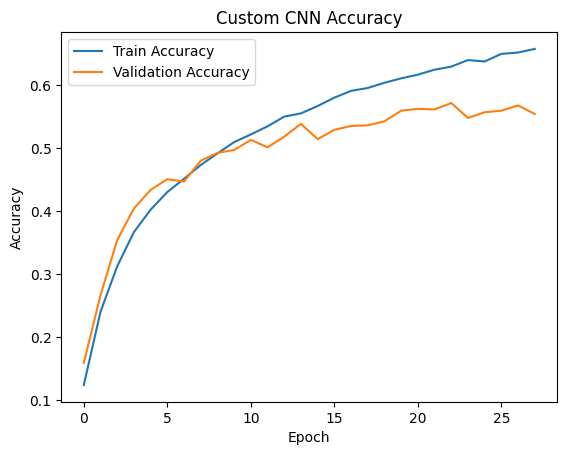

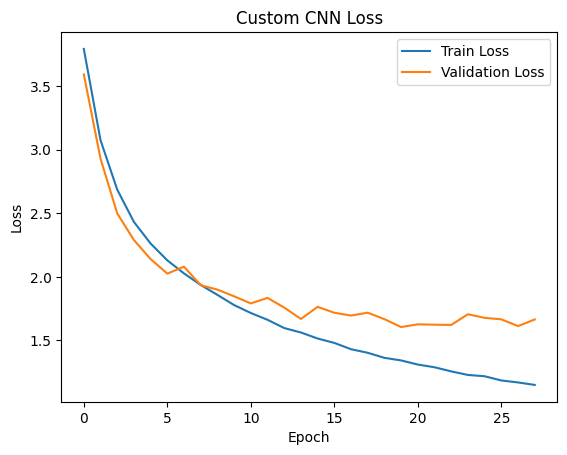

In [10]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Custom CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Custom CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [11]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 2,517,390 (9.60 MB)

 Trainable params: 838,660 (3.20 MB)

 Non-trainable params: 1,408 (5.50 KB)

 Optimizer params: 1,677,322 (6.40 MB)

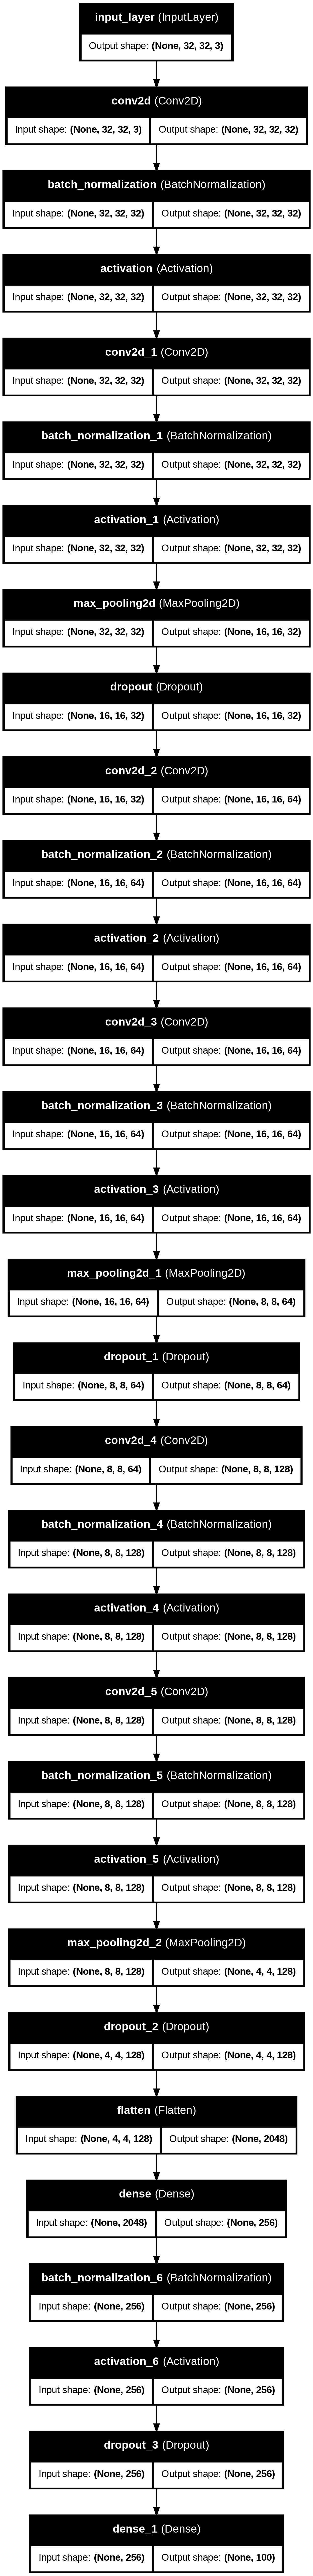

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='custom_cnn_architecture.png', show_shapes=True, show_layer_names=True)


In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Custom CNN Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5720 - loss: 1.6075
Custom CNN Test Accuracy: 0.5710999965667725


In [14]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


In [15]:
# Load VGG-16 without top layers, adjust input shape for CIFAR-100
base_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_vgg.layers:
    layer.trainable = False

# Add custom top layers
x = Flatten()(base_vgg.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(100, activation='softmax')(x)

vgg_model = Model(inputs=base_vgg.input, outputs=output)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [22]:
vgg_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [23]:
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_vgg_model.h5', monitor='val_accuracy', save_best_only=True)
]


In [24]:
history_vgg = vgg_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=callbacks
)


Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1253 - loss: 3.8804

704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.1253 - loss: 3.8799 - val_accuracy: 0.2834 - val_loss: 2.9370
Epoch 2/50
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2571 - loss: 3.0288

704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.2571 - loss: 3.0287 - val_accuracy: 0.3226 - val_loss: 2.7578
Epoch 3/50
700/704 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2829 - loss: 2.8597

704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.2829 - loss: 2.8596 - val_accuracy: 0.3402 - val_loss: 2.6755
Epoch 4/50
702/704 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3145 - loss: 2.7332

704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3145 - loss: 2.7332 - val_accuracy: 0.3428 - val_loss: 2.6144
Epoch 5/50
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3262 - loss: 2.6616

704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3262 - loss: 2.6616 - val_accuracy: 0.3526 - val_loss: 2.5766
Epoch 6/50
700/704 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3428 - loss: 2.5688

704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3428 - loss: 2.5690 - val_accuracy: 0.3590 - val_loss: 2.5529
Epoch 7/50
701/704 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3490 - loss: 2.5342

704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3490 - loss: 2.5343 - val_accuracy: 0.3602 - val_loss: 2.5272
Epoch 8/50
702/704 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3589 - loss: 2.4854

704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3589 - loss: 2.4854 - val_accuracy: 0.3724 - val_loss: 2.5004
Epoch 9/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3637 - loss: 2.4550 - val_accuracy: 0.3722 - val_loss: 2.5067
Epoch 10/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3681 - loss: 2.4215 - val_accuracy: 0.3686 - val_loss: 2.4906
Epoch 11/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3808 - loss: 2.3732 - val_accuracy: 0.3702 - val_loss: 2.4859
Epoch 12/50
702/704 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3943 - loss: 2.3355

704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3943 - loss: 2.3356 - val_accuracy: 0.3732 - val_loss: 2.4837
Epoch 13/50
702/704 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3953 - loss: 2.3109

704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3953 - loss: 2.3110 - val_accuracy: 0.3780 - val_loss: 2.4691
Epoch 14/50
702/704 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4011 - loss: 2.2757

704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4011 - loss: 2.2758 - val_accuracy: 0.3828 - val_loss: 2.4620
Epoch 15/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4049 - loss: 2.2358 - val_accuracy: 0.3760 - val_loss: 2.4727
Epoch 16/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4154 - loss: 2.2115 - val_accuracy: 0.3782 - val_loss: 2.4702
Epoch 17/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4248 - loss: 2.1880 - val_accuracy: 0.3738 - val_loss: 2.4757
Epoch 18/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4264 - loss: 2.1568 - val_accuracy: 0.3814 - val_loss: 2.4707
Epoch 19/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4313 - loss: 2.1301 - val_accuracy: 0.3726 - val_loss: 2.4763


In [25]:
test_loss, test_acc = vgg_model.evaluate(X_test, y_test)
print("VGG-16 Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.3669 - loss: 2.5089
VGG-16 Test Accuracy: 0.36719998717308044


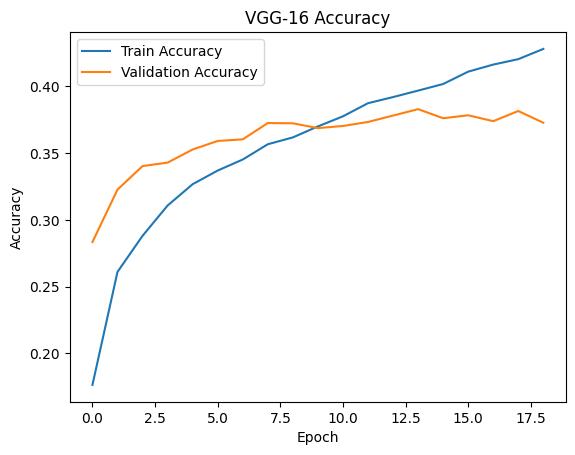

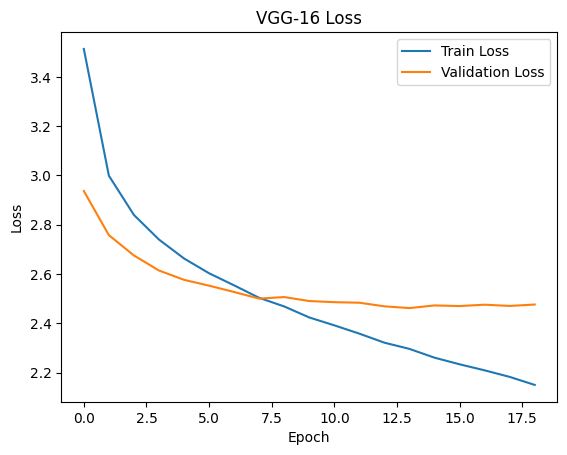

In [26]:
# Accuracy
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG-16 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history_vgg.history['loss'], label='Train Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.title('VGG-16 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [27]:
vgg_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,656,558 (59.73 MB)

 Trainable params: 313,956 (1.20 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 627,914 (2.40 MB)

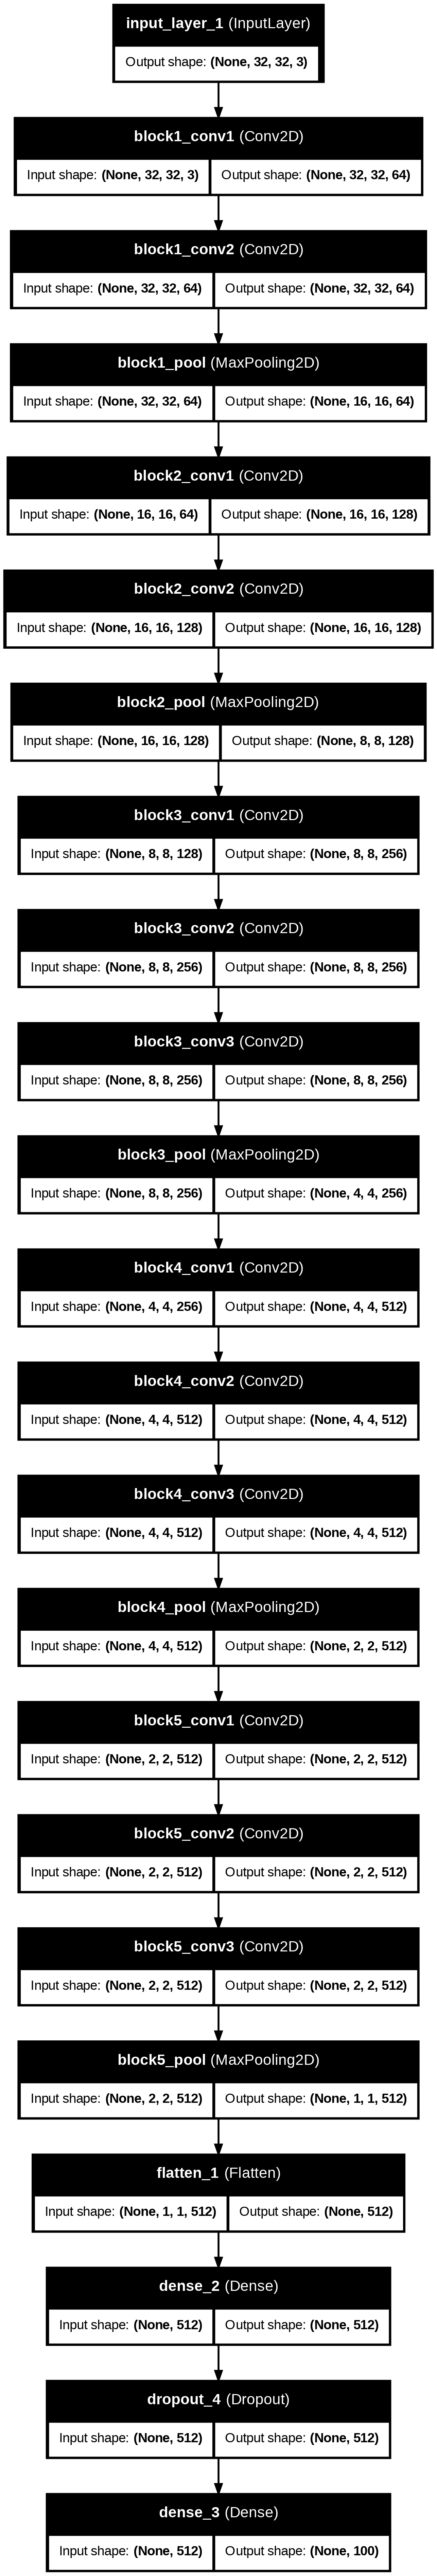

In [28]:
plot_model(vgg_model, to_file='vgg16_architecture.png', show_shapes=True, show_layer_names=True)


In [29]:
import pandas as pd

# Example values; replace with your actual results
results = {
    "Model": ["Custom CNN", "VGG-16"],
    "Test Accuracy": [0.5748, test_acc]
}

df_results = pd.DataFrame(results)
df_results


,Model,Test Accuracy
0,Custom CNN,0.5748
1,VGG-16,0.3672
